# 📦 Análise de Clientes de E-commerce

## 🎯 Objetivos do Projeto

O objetivo deste projeto é analisar os dados de clientes de uma empresa de e-commerce e construir um modelo preditivo capaz de estimar o valor que um cliente tende a gastar com base em características de seu comportamento, como:

- Tempo gasto no site da empresa;
- Tempo gasto no aplicativo móvel;
- Tempo gasto em ações de marketing por e-mail;
- Pertencimento ou não ao plano Premium.

A partir disso, busca-se:

- Entender os fatores que mais influenciam o gasto do cliente;
- Identificar possíveis oportunidades de negócio com base no perfil dos usuários;
- Construir modelos de Regressão para prever os gastos dos clientes;
- Avaliar o desempenho dos modelos utilizando métricas como RMSE e R².

Este projeto faz parte do portfólio de Ciência de Dados e tem como base o dataset disponível no Kaggle:  
🔗 [Ecommerce Customers Dataset](https://www.kaggle.com/datasets/srolka/ecommerce-customers)

# 1. BIBLIOTECAS:

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. DATASET:

In [65]:
df = pd.read_csv('Ecommerce Customers.csv')

In [66]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [67]:
# INFORMAÇÕES BÁSICAS DO DATASET:
print("INFORMAÇÕES BÁSICAS DO DATASET")
print("="*50)

print(f"\n Shape do dataset: {df.shape}")
print(f"   • {df.shape[0]} registros")
print(f"   • {df.shape[1]} colunas")

print(f"\n Tipos de dados:")
print(df.dtypes)

print(f"\n Informações gerais:")
print(df.info())

print(f"\n Estatísticas descritivas:")
print(df.describe())

print(f"\n Valores nulos por coluna:")
print(df.isnull().sum())

INFORMAÇÕES BÁSICAS DO DATASET

 Shape do dataset: (500, 8)
   • 500 registros
   • 8 colunas

 Tipos de dados:
Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 no

## 🔍 Inspeção Inicial dos Dados:

Nesta etapa, realizamos uma inspeção preliminar do dataset para compreender sua estrutura e características básicas. As principais ações executadas foram:

- Visualização das primeiras linhas do dataset;
- Verificação do número de registros e colunas (`shape`);
- Consulta aos tipos de dados de cada coluna;
- Avaliação da existência de valores ausentes;
- Geração de estatísticas descritivas para as variáveis numéricas.

A partir dessa análise inicial, observamos que:

- O dataset contém **500 registros** e **8 colunas**;
- Não há **valores ausentes**;
- A maioria das colunas é composta por variáveis **numéricas contínuas** (`float64`);
- As colunas `Email`, `Address` e `Avatar` são do tipo `object` e não possuem valor analítico direto para um modelo preditivo;
- A variável **alvo** para o problema de regressão é `Yearly Amount Spent`, que representa o valor anual gasto por um cliente.

Essas informações guiam as próximas etapas de análise exploratória e seleção de variáveis relevantes para o modelo.

# 3. ANÁLISE EXPLORATÓRIA DE DADOS (EDA):

## 3.1. DISTRIBUIÇÃO DO GASTO ANUAL POR CLIENTE (TARGET):

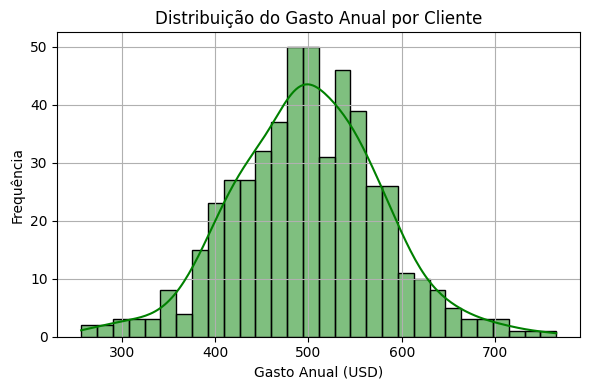

In [68]:
# HISTOGRAMA DO GASTO ANUAL POR CLIENTE:
plt.figure(figsize=(6, 4))
sns.histplot(df['Yearly Amount Spent'], kde=True, color='green', bins=30)
plt.title('Distribuição do Gasto Anual por Cliente')
plt.xlabel('Gasto Anual (USD)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

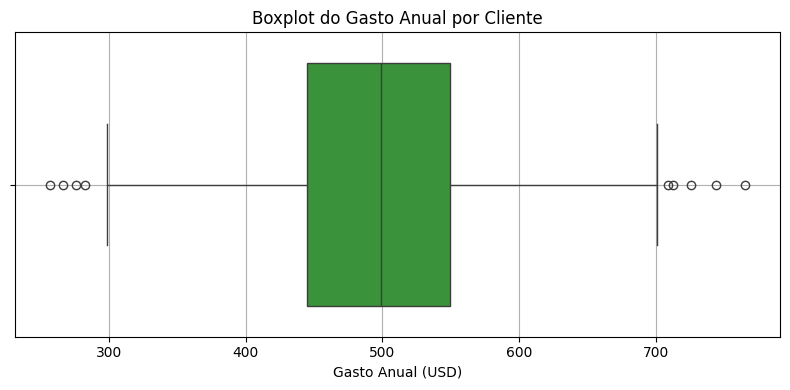

In [69]:
# BOXPLOT DO GASTO ANUAL:

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Yearly Amount Spent'], color='#2ca02c')
plt.title('Boxplot do Gasto Anual por Cliente')
plt.xlabel('Gasto Anual (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

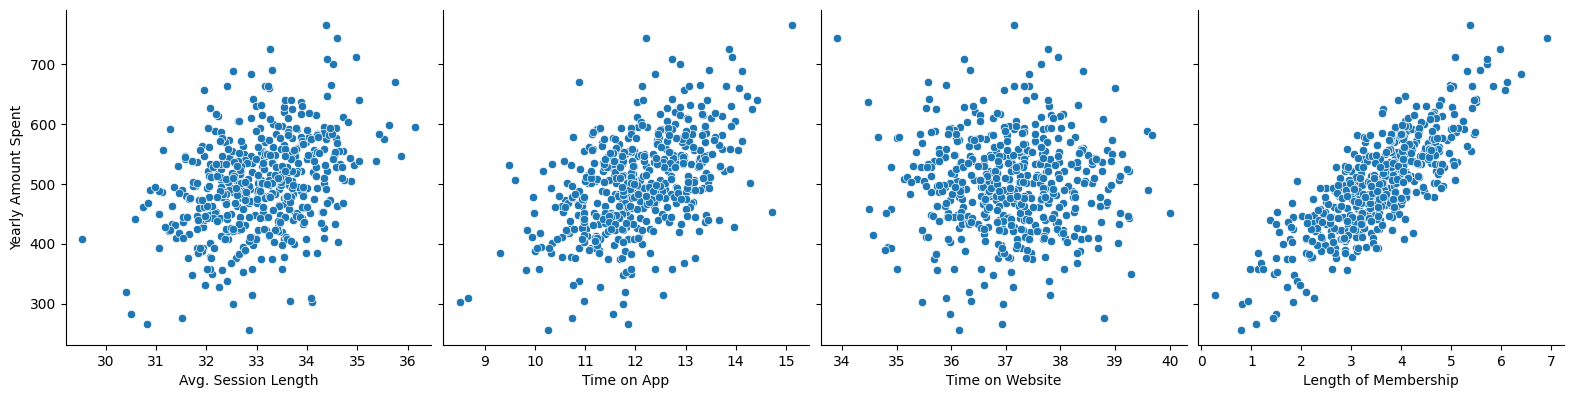

In [70]:
# SCATTERPLOT ENTRE VARIÁVEIS NUMÉRICAS E GASTO ANUAL:
sns.pairplot(
    df,
    x_vars=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'],
    y_vars='Yearly Amount Spent',
    height=4
)

plt.show()

# 3.2. DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS:

array([[<Axes: title={'center': 'Avg. Session Length'}>,
        <Axes: title={'center': 'Time on App'}>],
       [<Axes: title={'center': 'Time on Website'}>,
        <Axes: title={'center': 'Length of Membership'}>],
       [<Axes: title={'center': 'Yearly Amount Spent'}>, <Axes: >]],
      dtype=object)

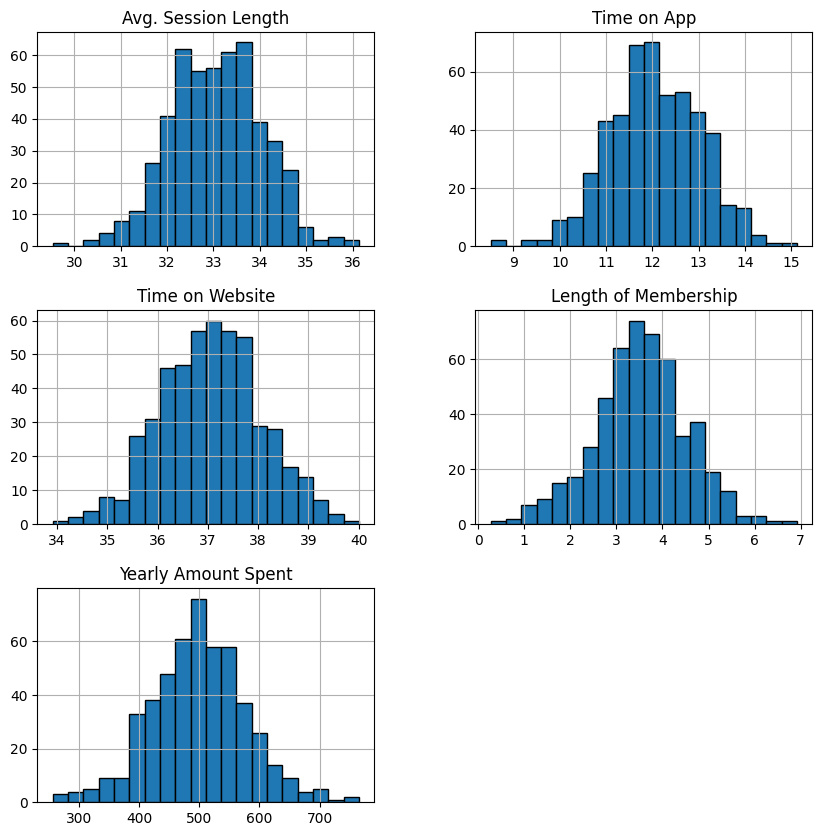

In [71]:
# HISTOGRAMA DAS VARIÁVEIS NUMÉRICAS::
df.hist(bins=20, figsize=(10,10), edgecolor='black')

## 3.3. MATRIZ DE CORRELAÇÃO ENTRE AS VARIÁVEIS NUMÉRICAS (HEATMAP):

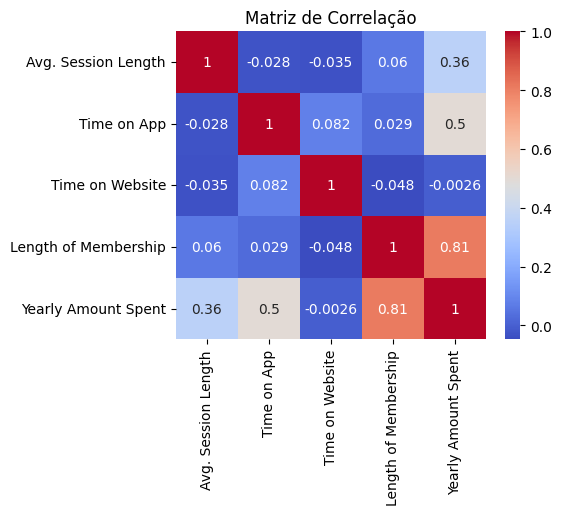

In [72]:
plt.figure(figsize=(5,4))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [73]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# 4. MODELAGEM - REGRESSÃO LINEAR::

In [74]:
# SPLIT DE TESTE E TREINO:

# FEATURES (APENAS NUMÉRICAS):
X = df.select_dtypes(include=[np.number]).drop(columns=['Yearly Amount Spent'])
# TARGET:
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [75]:
print(f"• X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"• y_train: {y_train.shape}, y_test: {y_test.shape}")

• X_train: (400, 4), X_test: (100, 4)
• y_train: (400,), y_test: (100,)


In [77]:
#TREINAMENTO DO MODELO:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
# PREDIÇÃO:
y_pred = model.predict(X_test)

In [80]:
# MÉTRICAS DO MODELO:
print(f"MAE (Erro Médio Absoluto): {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE (Erro Quadrático Médio): {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R² (Coeficiente de Determinação): {r2_score(y_test, y_pred):.3f}")

MAE (Erro Médio Absoluto): 8.558
MSE (Erro Quadrático Médio): 109.864
RMSE (Raiz do Erro Quadrático Médio): 10.482
R² (Coeficiente de Determinação): 0.978


# 5. ANÁLISE DOS RESÍDUOS:

In [82]:
# CÁLCULO DOS RESIDUOS:
residuals = y_test - y_pred

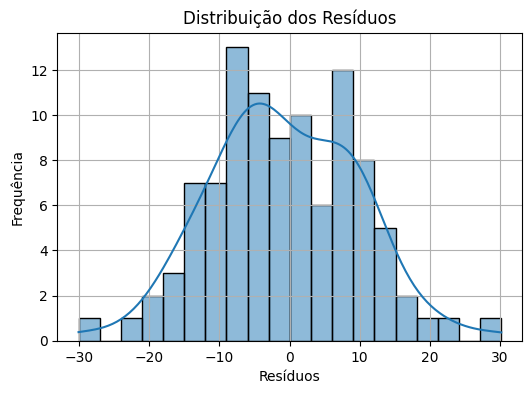

In [89]:
# HISTOGRAMA DOS RESÍDUOS:
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## Análise do Histograma da Distribuição dos Resíduos
- O histograma mostra uma distribuição que se assemelha a uma curva normal (sino), com o pico centrado perto de zero. A linha KDE (Estimativa de Densidade de Kernel) reforça essa observação.

- Uma distribuição normal dos resíduos indica que os erros do modelo são aleatórios e não seguem um padrão sistemático.

- A maioria dos resíduos está próxima de zero, o que é consistente com as baixas métricas de erro (MAE, RMSE) e o alto R2. Isso significa que o modelo está fazendo previsões precisas na maioria das vezes.

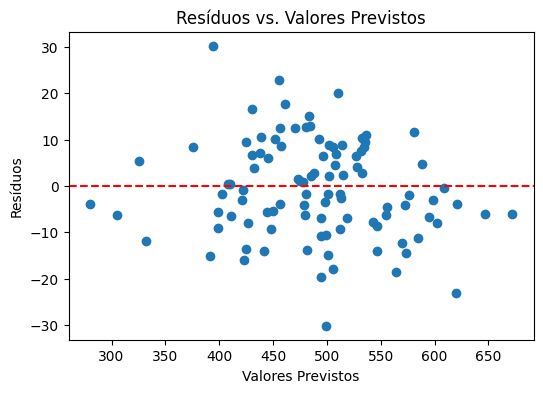

In [87]:
# GRÁFICO DE DISPERSÃO ENTRE RESÍDUOS E VALORES PREVISTOS:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

## Análise do Gráfico Resíduos vs. Valores Previstos (Gráfico de Dispersão)
Os pontos estão dispersos aleatoriamente em torno da linha horizontal de zero.

- Ausência de Padrão: p modelo está capturando bem a relação linear nos dados e que não há informações não lineares ou variáveis omitidas importantes que o modelo esteja deixando de fora.

- Homocedasticidade: a variância dos erros é constante para todos os níveis das variáveis preditoras.

# 6. COEFICIENTES DO MODELO:

In [93]:
# COEFICIENTES DO MODELO:
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])
print(coef)

# INTERCEPTOR:
print(f'\nIntercepto: {model.intercept_:.2f}')

                      Coeficientes
Avg. Session Length      25.596259
Time on App              38.785346
Time on Website           0.310386
Length of Membership     61.896829

Intercepto: -1044.26


- **Avg. Session Length (Duração Média da Sessão): 25.596259**

    - Para cada minuto adicional na duração média da sessão de um cliente, o Yearly Amount Spent aumenta em aproximadamente $25.60, mantendo todo o resto constante.

- **Time on App (Tempo no App): 38.785346**

    - Para cada minuto adicional que um cliente passa no aplicativo, o Yearly Amount Spent aumenta em aproximadamente $38.79, mantendo todo o resto constante.

- **Time on Website (Tempo no Website): 0.310386**

    - Para cada minuto adicional que um cliente passa no website, o Yearly Amount Spent aumenta em aproximadamente $0.31, mantendo todo o resto constante. Note que este é um impacto muito pequeno em comparação com as outras variáveis.

- **Length of Membership (Tempo como Membro): 61.896829**
    - Para cada ano adicional que um cliente é membro, o Yearly Amount Spent aumenta em aproximadamente $61.90, mantendo todo o resto constante.